# Unit 5 - Financial Planning

In [121]:
# Initial imports
import os
import json
import requests as rq
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [122]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [123]:
# Set current amount of crypto assets
ksm=10.4
dot=45.9
eth=.89
crypto=0
crypto+=ksm
crypto+=dot
crypto+=eth
monthly_income=20000

In [124]:
# Crypto API URLs
dot_url = "https://api.alternative.me/v2/ticker/Polkadot/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
ksm_url = "https://api.alternative.me/v2/ticker/Kusama/?convert=USD"

headers={
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple WebKit/5.37.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}


In [125]:
# Fetch crypto current prices
dot_data=rq.get(dot_url,headers=headers).json()
eth_data=rq.get(eth_url,headers=headers).json()
ksm_data=rq.get(ksm_url,headers=headers).json()


# Compute current value of my crpto
# YOUR CODE HERE!
#print(json.dumps(dot_data, indent=4))
#print(json.dumps(eth_data, indent=4))
#print(json.dumps(ksm_url, indent=4))


dot_curr_value = dot_data['data']['11517']['quotes']['USD']['price']
eth_curr_value = eth_data['data']['1027']['quotes']['USD']['price']
ksm_curr_value = ksm_data['data']['0']['quotes']['USD']['price']


dot_wallet = dot * dot_curr_value
eth_wallet = eth * eth_curr_value
ksm_wallet = ksm * ksm_curr_value

# Print current crypto wallet balance
print(f"The current value of your DOT wallet is ${dot_wallet:0.2f}")
print(f"The current value of your ETH wallet is ${eth_wallet:0.2f}")
print(f"The current value of your KSM wallet is ${ksm_wallet:0.2f}")



The current value of your DOT wallet is $325.43
The current value of your ETH wallet is $1412.17
The current value of your KSM wallet is $378.14


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [126]:
# Set current amount of shares

my_arkk=10.0
my_arkf=20.3
my_carv=100.2
my_sq=30.4
my_lyv=30.1
my_agg=50.9

In [127]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
nasdaq_api_key= os.getenv("NASDAQ_API_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



<AxesSubplot: xlabel='timestamp'>

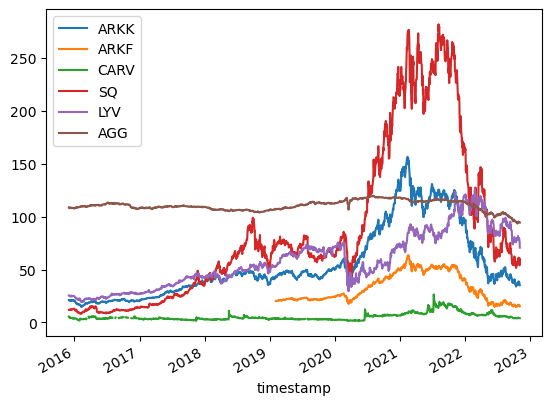

In [128]:
#Format current date as ISO format
start = pd.Timestamp("2010-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-07-14", tz="America/New_York").isoformat()
today = "2022-11-05"
# Set the tickers
tickers = "ARKK"

#Set timeframe to "1Day" for Alpaca API
timeframe = TimeFrame.Day

df_arkk = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=today
).df

tickers = "ARKF"
df_arkf = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=today
).df

tickers="CARV"
df_carv = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=today
).df

tickers="SQ"
df_sq = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=today
).df

tickers="LYV"
df_lyv = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=today
).df

tickers="AGG"
df_agg = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=today
).df

df_arkk.rename(columns={'close':'ARKK'},inplace=True)
df_arkf.rename(columns={'close':'ARKF'},inplace=True)
df_carv.rename(columns={'close':'CARV'},inplace=True)
df_sq.rename(columns={'close':'SQ'},inplace=True)
df_lyv.rename(columns={'close':'LYV'},inplace=True)
df_agg.rename(columns={'close':'AGG'},inplace=True)
heavy_hitters=pd.concat([df_arkk['ARKK'],df_arkf['ARKF'],df_carv['CARV'],df_sq['SQ'],df_lyv['LYV'],df_agg['AGG']],axis=1)
heavy_hitters.plot()

In [129]:
# Set current amount of crypto assets
ksm=10.4
dot=45.9
eth=.89

In [133]:
# Pick AGG and SPY close prices
arkk_close_price=df_arkk['ARKK'].tail(1)
arkf_close_price=df_arkf['ARKF'].tail(1)
carv_close_price=df_carv['CARV'].tail(1)
sq_close_price=df_sq['SQ'].tail(1)
lyv_close_price=df_lyv['LYV'].tail(1)
agg_close_price=df_agg['AGG'].tail(1)


# Print AGG and SPY close prices
print(f"Current ARKK closing price: ${arkk_close_price}")
print(f"Current ARKF closing price: ${arkf_close_price}")
print(f"Current CARV closing price: ${carv_close_price}")
print(f"Current SQ closing price: ${sq_close_price}")
print(f"Current LYV closing price: ${lyv_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current ARKK closing price: $timestamp
2022-11-04 04:00:00+00:00    35.22
Name: ARKK, dtype: float64
Current ARKF closing price: $timestamp
2022-11-04 04:00:00+00:00    15.26
Name: ARKF, dtype: float64
Current CARV closing price: $timestamp
2022-11-04 04:00:00+00:00    3.99
Name: CARV, dtype: float64
Current SQ closing price: $timestamp
2022-11-04 04:00:00+00:00    60.11
Name: SQ, dtype: float64
Current LYV closing price: $timestamp
2022-11-04 04:00:00+00:00    70.72
Name: LYV, dtype: float64
Current AGG closing price: $timestamp
2022-11-04 04:00:00+00:00    94.34
Name: AGG, dtype: float64


In [134]:
# Compute the current value of shares
# YOUR CODE HERE!
my_arkk_val=my_arkk * float(arkk_close_price)
my_arkf_val=my_arkf * float(arkf_close_price)
my_carv_val=my_carv * float(carv_close_price)
my_sq_val=my_sq * float(sq_close_price)
my_lyv_val=my_lyv * float(lyv_close_price)
my_agg_val=my_agg * float(agg_close_price)

# Print current value of shares
print(f"The current value of your {my_arkk} SPY shares is ${my_arkk_val:0.2f}")
print(f"The current value of your {my_arkf} ARKF shares is ${my_arkf_val:0.2f}")
print(f"The current value of your {my_carv} ARKF shares is ${my_carv_val:0.2f}")
print(f"The current value of your {my_sq} ARKF shares is ${my_sq_val:0.2f}")
print(f"The current value of your {my_lyv} ARKF shares is ${my_lyv_val:0.2f}")
print(f"The current value of your {my_agg} ARKF shares is ${my_agg_val:0.2f}")

The current value of your 10.0 SPY shares is $352.20
The current value of your 20.3 ARKF shares is $309.78
The current value of your 100.2 ARKF shares is $399.80
The current value of your 30.4 ARKF shares is $1827.34
The current value of your 30.1 ARKF shares is $2128.67
The current value of your 50.9 ARKF shares is $4801.91


### Savings Health Analysis

In [136]:
# Set monthly household income
# Consolidate financial assets data
shares = 0
shares += my_arkk_val
shares += my_arkf_val
shares += my_carv_val
shares += my_sq_val
shares += my_lyv_val
shares += my_agg_val

# Create savings DataFrame

Totals = {'amount':[crypto, shares]}
df_savings = pd.DataFrame(Totals, index= ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,57.190
shares,9819.698


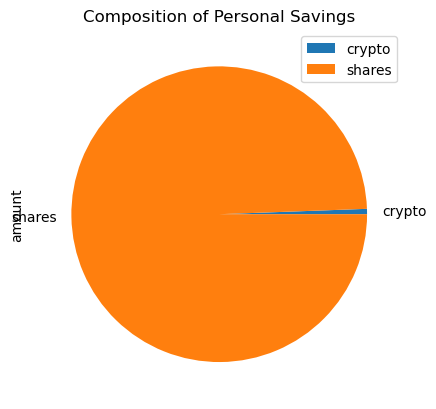

In [142]:
# Plot savings pie chart
plot = df_savings.plot(kind='pie',title = 'Composition of Personal Savings', y='amount')



In [143]:
# Set ideal emergency fund
rainy_day = monthly_income * 3

# Calculate total amount of savings
total_savings = 0
total_savings += crypto
total_savings += shares

# Validate saving health
if total_savings > rainy_day:
    print("congratulation you have enough money in your emergency fund.")
elif total_savings == rainy_day:
    print("congratulation for having reaching your financial goal.")
else:
    print(f"Almost There! ")

Almost There! 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [144]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [192]:

# Get 5 years' worth of historical data for SPY and AGG
# Set timeframe to "1Day"
timeframe = "1Day"
# Set the ticker information
tickers = ["ARKK","ARKF","CARV","SQ","LYV","AGG"]

# Get 5 year's worth of historical price data for AGG and SPY
df_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
ARKK_5 = df_5_year[df_5_year['symbol']=='ARKK'].drop('symbol', axis=1)
ARKF_5 = df_5_year[df_5_year['symbol']=='ARKF'].drop('symbol', axis=1)
CARV_5 = df_5_year[df_5_year['symbol']=='CARV'].drop('symbol', axis=1)
SQ_5 = df_5_year[df_5_year['symbol']=='SQ'].drop('symbol', axis=1)
LYV_5 = df_5_year[df_5_year['symbol']=='LYV'].drop('symbol', axis=1)
AGG_5 = df_5_year[df_5_year['symbol']=='AGG'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_5_year = pd.concat([ARKK_5,ARKF_5,CARV_5,SQ_5,LYV_5,AGG_5],axis=1, keys=['ARKK','ARKF','CARV','SQ','LYV','AGG'])


# Display sample data
df_5_year.head()


ARKK                                     \
                              open     high      low    close  volume   
timestamp                                                               
2016-05-02 04:00:00+00:00  18.9803  19.0000  18.9803  19.0000   316.0   
2016-05-03 04:00:00+00:00  18.7200  18.7200  18.7200  18.7200   168.0   
2016-05-04 04:00:00+00:00  18.2000  18.2100  18.2000  18.2100   501.0   
2016-05-05 04:00:00+00:00  18.1603  18.1603  18.1603  18.1603   100.0   
2016-05-06 04:00:00+00:00  18.0700  18.2900  17.9397  17.9397  2992.0   

                                                 ARKF           ...      LYV  \
                          trade_count       vwap open high low  ...   volume   
timestamp                                                       ...            
2016-05-02 04:00:00+00:00         4.0  18.995285  NaN  NaN NaN  ...  1293869   
2016-05-03 04:00:00+00:00         2.0  18.706845  NaN  NaN NaN  ...  1302596   
2016-05-04 04:00:00+00:00         3.0  18.208116  NaN  NaN NaN  ...  3803692   
2016-05-05 04:00:00+00:00         1.0  18.160300  NaN  NaN NaN  ...  2813200   
2016-05-06 04:00:00+00:00        17.0  18.068574  NaN  NaN NaN  ...  2257262   

                                                     AGG                      \
                          trade_count       vwap    open      high       low   
timestamp                                                                      
2016-05-02 04:00:00+00:00        8257  21.878692  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00        9071  21.693930  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00       21644  22.333711  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00       15885  22.995709  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00       11922  23.298436  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967  

[5 rows x 42 columns]

In [193]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 200

MC_SIM= MCSimulation(
    portfolio_data= df_5_year,
    num_simulation = num_sims,
    weights= [1/6,1/6,1/6,1/6,1/6,1/6],
    num_trading_days = 252 * 30
)

In [194]:
# Printing the simulation input data
MC=MC_SIM.portfolio_data.head()
MC

ARKK                                     \
                              open     high      low    close  volume   
timestamp                                                               
2016-05-02 04:00:00+00:00  18.9803  19.0000  18.9803  19.0000   316.0   
2016-05-03 04:00:00+00:00  18.7200  18.7200  18.7200  18.7200   168.0   
2016-05-04 04:00:00+00:00  18.2000  18.2100  18.2000  18.2100   501.0   
2016-05-05 04:00:00+00:00  18.1603  18.1603  18.1603  18.1603   100.0   
2016-05-06 04:00:00+00:00  18.0700  18.2900  17.9397  17.9397  2992.0   

                                                              ARKF       ...  \
                          trade_count       vwap daily_return open high  ...   
timestamp                                                                ...   
2016-05-02 04:00:00+00:00         4.0  18.995285          NaN  NaN  NaN  ...   
2016-05-03 04:00:00+00:00         2.0  18.706845    -0.014737  NaN  NaN  ...   
2016-05-04 04:00:00+00:00         3.0  18.208116    -0.027244  NaN  NaN  ...   
2016-05-05 04:00:00+00:00         1.0  18.160300    -0.002729  NaN  NaN  ...   
2016-05-06 04:00:00+00:00        17.0  18.068574    -0.012147  NaN  NaN  ...   

                                 LYV                  AGG                      \
                                vwap daily_return    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00  21.878692          NaN  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00  21.693930    -0.009589  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00  22.333711     0.034578  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00  22.995709     0.035205  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00  23.298436     0.008610  111.12  111.1200  110.9700   

                                                                     \
                             close   volume trade_count        vwap   
timestamp                                                             
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199   
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995   
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063   
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363   
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00     0.001853  
2016-05-04 04:00:00+00:00     0.000451  
2016-05-05 04:00:00+00:00     0.002526  
2016-05-06 04:00:00+00:00    -0.001530  

[5 rows x 48 columns]

In [195]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_SIM.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 110.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 120.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 130.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 140.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 150.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 160.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 170.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 180.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 190.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
1,1.003106,1.013995e+00,9.938692e-01,1.007012,9.994998e-01,0.988580,1.046639e+00,1.018289e+00,1.005742e+00,1.009604e+00,...,1.000921e+00,1.002547e+00,1.032589e+00,0.975157,1.011795,1.042347,0.991237,9.779364e-01,1.032055e+00,1.010568e+00
2,1.038553,9.908975e-01,9.850359e-01,1.008747,1.039953e+00,1.009197,1.041224e+00,1.001570e+00,1.004488e+00,1.014224e+00,...,9.797252e-01,9.990280e-01,1.041206e+00,0.977141,1.009718,1.019463,0.974993,1.032905e+00,1.016610e+00,1.012097e+00
3,1.038937,9.671831e-01,9.677283e-01,1.042341,1.043694e+00,0.987286,1.019279e+00,1.006495e+00,9.997464e-01,9.734500e-01,...,9.906643e-01,1.001147e+00,1.029261e+00,0.996949,1.001386,1.026118,1.005080,1.039123e+00,1.001580e+00,9.864886e-01
4,1.030283,9.707122e-01,9.741598e-01,1.037052,1.014114e+00,1.003967,1.038277e+00,9.766460e-01,9.876813e-01,9.568351e-01,...,9.641428e-01,9.896791e-01,9.891846e-01,0.970807,1.002014,0.991381,1.015821,1.034495e+00,9.849288e-01,1.018004e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,356348.707700,3.668522e+07,2.439695e+06,201910.027281,3.901845e+06,761676.542285,2.050037e+06,1.747196e+06,3.962885e+06,2.263902e+06,...,1.210624e+06,1.686856e+07,2.706710e+06,92589.979099,9782.364488,87411.257353,521632.479076,1.055022e+06,2.123871e+06,9.456050e+06
7557,361715.501346,3.674412e+07,2.510533e+06,196994.657600,3.788810e+06,752613.907243,1.992122e+06,1.738140e+06,3.975483e+06,2.308717e+06,...,1.221503e+06,1.730695e+07,2.617231e+06,88852.456358,9690.526180,86751.727174,510284.099271,1.054839e+06,2.142333e+06,9.443923e+06
7558,365541.056259,3.831485e+07,2.587287e+06,199293.893869,3.809937e+06,761813.899317,2.021586e+06,1.787309e+06,3.986890e+06,2.299702e+06,...,1.235263e+06,1.731402e+07,2.633279e+06,91238.237151,9409.719415,86892.329687,502698.335068,1.077383e+06,2.110058e+06,9.710260e+06
7559,365924.263741,3.693013e+07,2.642887e+06,206711.855655,3.836455e+06,766589.154017,2.007474e+06,1.791230e+06,4.020616e+06,2.387009e+06,...,1.244341e+06,1.771515e+07,2.591185e+06,90084.143428,9387.694096,84508.720420,496750.859576,1.040915e+06,2.100038e+06,9.914425e+06


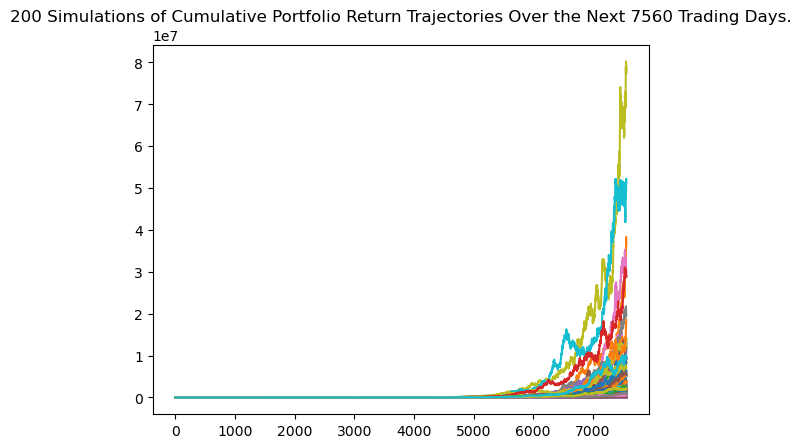

In [196]:
# Plot simulation outcomes
line_plot = MC_SIM.plot_simulation()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 110.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 120.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 130.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 140.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 150.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 160.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 170.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 180.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

Running Monte Carlo simulation number 190.


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-

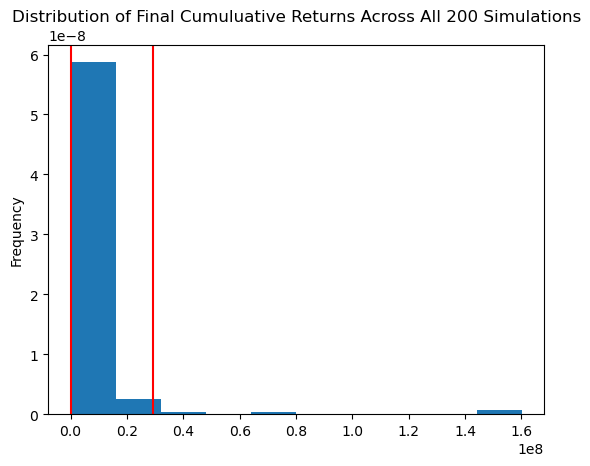

In [186]:
# Plot probability distribution and confidence intervals
dist_plot = MC_SIM.plot_distribution()

### Retirement Analysis

In [198]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_SIM.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           2.000000e+02
mean            3.339310e+06
std             8.007892e+06
min             6.483243e+03
25%             3.149919e+05
50%             8.992649e+05
75%             2.524195e+06
max             7.780451e+07
95% CI Lower    1.825792e+04
95% CI Upper    1.992061e+07
Name: 7560, dtype: float64


c:\Users\Temp\Desktop\Rutgers\.Base_camp\Base_camp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [199]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stats[8]*20000,6)
ci_upper = round(sum_stats[9]*20000,6)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $365158438.025588 and $398412101549.61755


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [200]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $365158438.025588 and $398412101549.61755


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")